In [1]:
#!pip install tensorflow opencv-python matplotlib

In [2]:
#!pip install keras

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

2023-03-19 15:05:28.769970: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-19 15:05:29.508138: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-19 15:05:29.664787: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-19 15:05:29.664820: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

# Preprocessing

In [4]:
train_df = pd.read_csv(r'fashion-mnist_train.csv')
test_df = pd.read_csv(r'fashion-mnist_test.csv')


In [5]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_df.shape

(60000, 785)

In [7]:
test_df.shape

(10000, 785)

In [8]:
#check nulls
print(train_df.isnull().any())

label       False
pixel1      False
pixel2      False
pixel3      False
pixel4      False
            ...  
pixel780    False
pixel781    False
pixel782    False
pixel783    False
pixel784    False
Length: 785, dtype: bool


In [9]:
# split data into x (image) and y (label) arrays 
train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255 #rescale from 255 to 1 for better convergence
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

In [10]:
# split the training set into validation and validate arrays
# idea: compare with diff test size 
x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

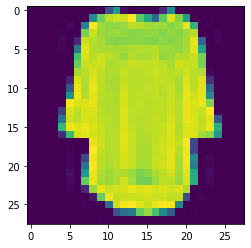

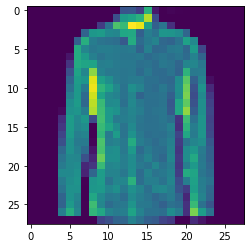

In [11]:
# images

image = x_train[200, :].reshape((28, 28))

plt.imshow(image)
plt.show()

image = x_train[400, :].reshape((28, 28))

plt.imshow(image)
plt.show()

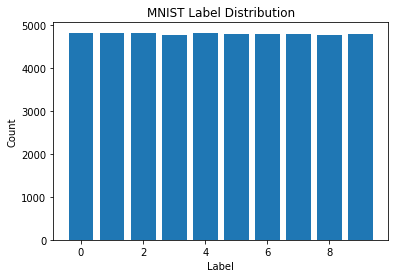

In [12]:
#Distribution of classes and labels

counts, bins = np.histogram(y_train, bins=10, range=(0,10))
fig, ax = plt.subplots()
ax.bar(bins[:-1], counts, width=0.8)
ax.set_xlabel('Label')
ax.set_ylabel('Count')
ax.set_title('MNIST Label Distribution')
plt.show()

# Building the model

In [60]:
#define the model 
im_rows = 28
im_cols = 28 
batch_size = 512
im_shape = (im_rows, im_cols, 1) #2 dimensional 
num_classes = 10

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print(x_train.shape)
print(x_test.shape)
print(x_validate.shape)

model = Sequential()
model.add (Conv2D(filters=32,kernel_size =3, activation = 'relu',input_shape = im_shape))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])




(48000, 28, 28, 1)
(10000, 28, 28, 1)
(12000, 28, 28, 1)


In [61]:
#train model
history = model.fit(x_train,y_train,batch_size= batch_size,epochs= 20,verbose = 1,validation_data= (x_validate,y_validate))

Epoch 1/20
94/94 [==============================] - 7s 68ms/step - loss: 0.8287 - accuracy: 0.7153 - val_loss: 0.4969 - val_accuracy: 0.8244
Epoch 2/20
94/94 [==============================] - 6s 65ms/step - loss: 0.4625 - accuracy: 0.8395 - val_loss: 0.4088 - val_accuracy: 0.8610
Epoch 3/20
94/94 [==============================] - 6s 66ms/step - loss: 0.4089 - accuracy: 0.8558 - val_loss: 0.3770 - val_accuracy: 0.8677
Epoch 4/20
94/94 [==============================] - 6s 69ms/step - loss: 0.3751 - accuracy: 0.8685 - val_loss: 0.3494 - val_accuracy: 0.8804
Epoch 5/20
94/94 [==============================] - 6s 65ms/step - loss: 0.3538 - accuracy: 0.8762 - val_loss: 0.3366 - val_accuracy: 0.8840
Epoch 6/20
94/94 [==============================] - 6s 66ms/step - loss: 0.3377 - accuracy: 0.8803 - val_loss: 0.3480 - val_accuracy: 0.8734
Epoch 7/20
94/94 [==============================] - 6s 66ms/step - loss: 0.3261 - accuracy: 0.8867 - val_loss: 0.3221 - val_accuracy: 0.8863
Epoch 8/20
94

# Evaluate Performance

In [62]:
score = model.evaluate(x_validate, y_validate, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.25806719064712524
Test accuracy: 0.9072499871253967


In [63]:
history.history

{'loss': [0.8286571502685547,
  0.46246838569641113,
  0.4089054465293884,
  0.3750641644001007,
  0.3538461923599243,
  0.3376585841178894,
  0.32613760232925415,
  0.3168456554412842,
  0.30390170216560364,
  0.2953389585018158,
  0.2876778841018677,
  0.2818220555782318,
  0.2721116542816162,
  0.2681409418582916,
  0.26211050152778625,
  0.25721195340156555,
  0.25016987323760986,
  0.24818046391010284,
  0.24371449649333954,
  0.237706258893013],
 'accuracy': [0.7152500152587891,
  0.8395000100135803,
  0.8557500243186951,
  0.8684791922569275,
  0.8761666417121887,
  0.8803125023841858,
  0.8866875171661377,
  0.8879583477973938,
  0.8922083377838135,
  0.8957499861717224,
  0.898312509059906,
  0.8986666798591614,
  0.9026041626930237,
  0.9043541550636292,
  0.9067916870117188,
  0.9077291488647461,
  0.9093541502952576,
  0.911062479019165,
  0.9132291674613953,
  0.9149166941642761],
 'val_loss': [0.496886670589447,
  0.40876448154449463,
  0.3769645094871521,
  0.34935802221

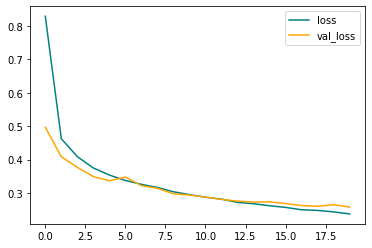

In [64]:
#loss plot
fig = plt.figure()
plt.plot(history.history['loss'],color = 'teal',label = 'loss')
plt.plot(history.history['val_loss'],color = 'orange',label = 'val_loss')
plt.legend(loc='upper right')
plt.show()